### Summary of Project

**Objective:**
The project involves analyzing the Iowa housing market data using different statistical and machine learning techniques to understand and predict house prices. The analysis includes data cleaning, simple and multiple linear regression, hypothesis testing, and implementing the LASSO algorithm. The programming tasks are to be done using Python.

**Data Preparation:**
1. **Dataset:** Iowa_Housing_Data_Mod.xlsx
2. **Feature Definitions:** Provided in Iowa Housing Data Feature Definitions.docx
3. **Initial Data Cleaning:**
   - Create the variable `Age of House` as `Year Sold - Year Built`.
   - Create the variable `CentralAC Dummy` as 1 if central air conditioning is present (Y), otherwise 0 (N).
   - Ensure the dataset has 26 features after these additions.

**Part A: Simple Linear Regression**
- **Task:** Run a simple linear regression with `SalePrice` as the target variable and `GrLivArea` as the feature.
- **Metrics to Report:**
  - R-squared value and its significance.
  - Estimate of Beta (Beta-hat), its economic interpretation, and its statistical significance.

**Part B: Multiple Linear Regression**
- **Task:** Run a multiple linear regression with `SalePrice` as the target variable and the following features:
  - LotArea
  - OverallQual
  - OverallCond
  - Age of House
  - CentralAC Dummy
  - GrLivArea
  - GarageCars
- **Metrics to Report:**
  - R-squared and Adjusted R-squared, and the reason for their difference.
  - Parameter estimates (Beta-hat) for each feature and their statistical significance.
  - Economic interpretation of the Beta coefficients for `Age of House` and `CentralAC Dummy`.

**Part C: LASSO**
- **Task:** Run the LASSO algorithm on all features with `SalePrice` as the target variable.
  - Training set: First 1800 observations
  - Validation set: Next 600 observations
  - Test set: Remaining observations
- **Lambda Range:** Try lambda values from 0.01 to 0.1 and plot MSE as a function of lambda.


# Reading the Data

In [1]:
import pandas as pd
data = pd.read_excel("/Users/jonathantrejo/Desktop/ML in Finance/Iowa_Housing_Data_Mod.xlsx")
data

,Id,LotArea,OverallQual,OverallCond,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,YrSold,SalePrice,Unnamed: 28,Unnamed: 29
0,1,8450,7,5,2003,150,856,Y,856,854,...,548,0,61,0,0,0,2008,208500,NaN,NaN
1,2,9600,6,8,1976,284,1262,Y,1262,0,...,460,298,0,0,0,0,2007,181500,NaN,NaN
2,3,11250,7,5,2001,434,920,Y,920,866,...,608,0,42,0,0,0,2008,223500,NaN,NaN
3,4,9550,7,5,1915,540,756,Y,961,756,...,642,0,35,272,0,0,2006,140000,NaN,NaN
4,5,14260,8,5,2000,490,1145,Y,1145,1053,...,836,192,84,0,0,0,2008,250000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915,1936,4,7,1970,546,546,Y,546,546,...,0,0,0,0,0,0,2006,90500,NaN,NaN
2904,2916,1894,4,5,1970,294,546,Y,546,546,...,286,0,24,0,0,0,2006,71000,NaN,NaN
2905,2917,20000,5,7,1960,0,1224,Y,1224,0,...,576,474,0,0,0,0,2006,131000,NaN,NaN
2906,2918,10441,5,5,1992,575,912,Y,970,0,...,0,80,32,0,0,0,2006,132000,NaN,NaN


# Data Preperation

In [2]:
data = data.iloc[:, :-2]
data

,Id,LotArea,OverallQual,OverallCond,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,YrSold,SalePrice
0,1,8450,7,5,2003,150,856,Y,856,854,...,0,2,548,0,61,0,0,0,2008,208500
1,2,9600,6,8,1976,284,1262,Y,1262,0,...,1,2,460,298,0,0,0,0,2007,181500
2,3,11250,7,5,2001,434,920,Y,920,866,...,1,2,608,0,42,0,0,0,2008,223500
3,4,9550,7,5,1915,540,756,Y,961,756,...,1,3,642,0,35,272,0,0,2006,140000
4,5,14260,8,5,2000,490,1145,Y,1145,1053,...,1,3,836,192,84,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915,1936,4,7,1970,546,546,Y,546,546,...,0,0,0,0,0,0,0,0,2006,90500
2904,2916,1894,4,5,1970,294,546,Y,546,546,...,0,1,286,0,24,0,0,0,2006,71000
2905,2917,20000,5,7,1960,0,1224,Y,1224,0,...,1,2,576,474,0,0,0,0,2006,131000
2906,2918,10441,5,5,1992,575,912,Y,970,0,...,0,0,0,80,32,0,0,0,2006,132000


In [3]:
data['age_of_house'] = data["YrSold"] - data['YearBuilt']
data

,Id,LotArea,OverallQual,OverallCond,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,YrSold,SalePrice,age_of_house
0,1,8450,7,5,2003,150,856,Y,856,854,...,2,548,0,61,0,0,0,2008,208500,5
1,2,9600,6,8,1976,284,1262,Y,1262,0,...,2,460,298,0,0,0,0,2007,181500,31
2,3,11250,7,5,2001,434,920,Y,920,866,...,2,608,0,42,0,0,0,2008,223500,7
3,4,9550,7,5,1915,540,756,Y,961,756,...,3,642,0,35,272,0,0,2006,140000,91
4,5,14260,8,5,2000,490,1145,Y,1145,1053,...,3,836,192,84,0,0,0,2008,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915,1936,4,7,1970,546,546,Y,546,546,...,0,0,0,0,0,0,0,2006,90500,36
2904,2916,1894,4,5,1970,294,546,Y,546,546,...,1,286,0,24,0,0,0,2006,71000,36
2905,2917,20000,5,7,1960,0,1224,Y,1224,0,...,2,576,474,0,0,0,0,2006,131000,46
2906,2918,10441,5,5,1992,575,912,Y,970,0,...,0,0,80,32,0,0,0,2006,132000,14


In [4]:
data["CentralAir"] = [1 if i == "Y" else 0 for i in data["CentralAir"]]
data

,Id,LotArea,OverallQual,OverallCond,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,YrSold,SalePrice,age_of_house
0,1,8450,7,5,2003,150,856,1,856,854,...,2,548,0,61,0,0,0,2008,208500,5
1,2,9600,6,8,1976,284,1262,1,1262,0,...,2,460,298,0,0,0,0,2007,181500,31
2,3,11250,7,5,2001,434,920,1,920,866,...,2,608,0,42,0,0,0,2008,223500,7
3,4,9550,7,5,1915,540,756,1,961,756,...,3,642,0,35,272,0,0,2006,140000,91
4,5,14260,8,5,2000,490,1145,1,1145,1053,...,3,836,192,84,0,0,0,2008,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915,1936,4,7,1970,546,546,1,546,546,...,0,0,0,0,0,0,0,2006,90500,36
2904,2916,1894,4,5,1970,294,546,1,546,546,...,1,286,0,24,0,0,0,2006,71000,36
2905,2917,20000,5,7,1960,0,1224,1,1224,0,...,2,576,474,0,0,0,0,2006,131000,46
2906,2918,10441,5,5,1992,575,912,1,970,0,...,0,0,80,32,0,0,0,2006,132000,14


In [5]:
data = data.fillna(data.mean())
data

,Id,LotArea,OverallQual,OverallCond,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,YrSold,SalePrice,age_of_house
0,1,8450,7,5,2003,150,856,1,856,854,...,2,548,0,61,0,0,0,2008,208500,5
1,2,9600,6,8,1976,284,1262,1,1262,0,...,2,460,298,0,0,0,0,2007,181500,31
2,3,11250,7,5,2001,434,920,1,920,866,...,2,608,0,42,0,0,0,2008,223500,7
3,4,9550,7,5,1915,540,756,1,961,756,...,3,642,0,35,272,0,0,2006,140000,91
4,5,14260,8,5,2000,490,1145,1,1145,1053,...,3,836,192,84,0,0,0,2008,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915,1936,4,7,1970,546,546,1,546,546,...,0,0,0,0,0,0,0,2006,90500,36
2904,2916,1894,4,5,1970,294,546,1,546,546,...,1,286,0,24,0,0,0,2006,71000,36
2905,2917,20000,5,7,1960,0,1224,1,1224,0,...,2,576,474,0,0,0,0,2006,131000,46
2906,2918,10441,5,5,1992,575,912,1,970,0,...,0,0,80,32,0,0,0,2006,132000,14


In [6]:
data.isnull().sum()

Id               0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
BsmtUnfSF        0
TotalBsmtSF      0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
PoolArea         0
YrSold           0
SalePrice        0
age_of_house     0
dtype: int64

In [7]:
X = data["GrLivArea"].values.reshape(-1, 1)
Y = data["SalePrice"].values.reshape(-1, 1)

In [9]:
print(X)

[[1710]
 [1262]
 [1786]
 ...
 [1224]
 [ 970]
 [2000]]


In [10]:
print(Y)

[[208500]
 [181500]
 [223500]
 ...
 [131000]
 [132000]
 [188000]]


# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [12]:
lr = LinearRegression()
lr.fit(X,Y)
pred = lr.predict(X)


In [13]:
print(r2_score(Y, pred))

0.5199213705846728


In [14]:
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,7010.823618
[1710],115.922811
[1262],None
[1786],None
[1717],None
...,...
[1092],None
[1092],None
[1224],None


# Multiple Linear Regression

In [15]:
X2 = data[["GrLivArea", "LotArea", "OverallQual", "OverallCond", "age_of_house", "CentralAir", "GarageCars"]]
Y2 = data["SalePrice"].values

In [16]:
Y2

array([208500, 181500, 223500, ..., 131000, 132000, 188000])

In [17]:
X2

,GrLivArea,LotArea,OverallQual,OverallCond,age_of_house,CentralAir,GarageCars
0,1710,8450,7,5,5,1,2
1,1262,9600,6,8,31,1,2
2,1786,11250,7,5,7,1,2
3,1717,9550,7,5,91,1,3
4,2198,14260,8,5,8,1,3
...,...,...,...,...,...,...,...
2903,1092,1936,4,7,36,1,0
2904,1092,1894,4,5,36,1,1
2905,1224,20000,5,7,46,1,2
2906,970,10441,5,5,14,1,0


In [18]:
lr2 = LinearRegression()
lr2.fit(X2,Y2)
pred2 = lr2.predict(X2)


In [19]:
r_squared = r2_score(Y2, pred2)
r_squared

0.8043872144205813

In [20]:
n = len(Y2)
p = X2.shape[1]

adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
adjusted_r_squared

0.8039150456278034

In [21]:
lr2.coef_

array([ 5.78881660e+01,  1.22960295e+00,  2.29336529e+04,  5.70027480e+03,
       -5.31609501e+02, -6.15391232e+03,  1.22124846e+04])

#### LASSO

In [22]:
train = data.iloc[:1800] 
val = data.iloc[1800:2400]
test = data.iloc[2400:2908]

In [23]:
X_train, X_val,X_test = train.drop('SalePrice', axis=1), val.drop('SalePrice', axis=1), test.drop('SalePrice', axis=1)

In [24]:
y_train, y_val,y_test = train[['SalePrice']], val[['SalePrice']], test[['SalePrice']] 

In [25]:
from sklearn.linear_model import Lasso

In [26]:
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.931e+11, tolerance: 1.073e+09
  model = cd_fast.enet_coordinate_descent(


In [27]:
print(r2_score(y_test,lasso_pred))

0.8594260787514217


In [28]:
coeffs2 = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs2

,1
0,
intercept,-923022.307442
Id,-0.067889
LotArea,0.598464
OverallQual,15175.227979
OverallCond,6422.579446
YearBuilt,1088.533321
BsmtUnfSF,-18.20344
TotalBsmtSF,43.187122
CentralAir,-10996.741439


In [29]:
import numpy as np
alphas=np.linspace(0.01, 0.1, 10)
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_test)
    mses.append((mean_squared_error(y_test,pred)))
    print((mean_squared_error(y_test,pred)))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.213e+11, tolerance: 1.073e+09
  model = cd_fast.enet_coordinate_descent(


815311343.6850591


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.129e+11, tolerance: 1.073e+09
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.055e+11, tolerance: 1.073e+09
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

815311187.8812975
815311032.106111
815310876.3594927


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.931e+11, tolerance: 1.073e+09
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.879e+11, tolerance: 1.073e+09
  model = cd_fast.enet_coordinate_descent(


815310720.641442
815310564.9519603
815310409.2910584
815310253.65873
815310098.0549705
815309942.4797846


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.831e+11, tolerance: 1.073e+09
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.788e+11, tolerance: 1.073e+09
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

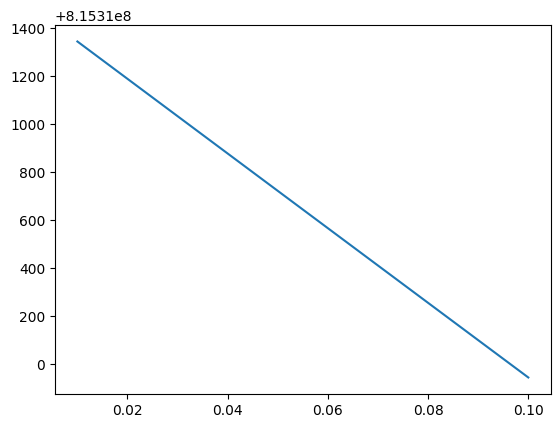

In [30]:
import matplotlib.pyplot as plt 
plt.plot(alphas, mses)